# pretrained=False

In [ ]:
'''
딥러닝 학습 노트북
#데이터 조작: 파일확인, 데이터 불러오기, 데이터 전처리
#데이터 전처리: totensor, transpose.compose(v2.normalization) <> torch.batchnorm

transform
v2.totensor
v2.normal
StandardScaler, transform, floatTensor


compose, resize, centercrop_1st

kmeans, kfold

train_test_split
make_classification

T.


#모델 생성: resnet18, LogisticRegression, vgg(**), visiontransformer
#모델변수:

linear, Copnv2d, MaxPool2d/AvgPool2d

bn
relu
sigmoid

flatten

#모델 학습 및 손실계산: CrossEntropyLoss, BCELoss, BCEWithLoss, Focal Loss, HubberLoss()
#최적화함수: SGD, AdamW(momentum, rmsprop)

라벨스무딩

torch.rand()
np.random.seed()
device
model.train()

epoch, lr

early stoping
make_dot




#정확도 확인
accuracy, f1-score, ROC-Curve

confution_matrix, accuracy_score, threshold: 3rd_Metric_code

#평가
model.eval()
torch.no_grad()
torch.max()

class_name

#저장
'''

'\n딥러닝 학습 노트북\n#데이터 조작: 파일확인, 데이터 불러오기, 데이터 전처리\n#데이터 전처리: totensor, transpose.compose(v2.normalization) <> torch.batchnorm\nv2.totensor\n\nv2.normal\n\ncompose, resize, centercrop_1st\n\n\ntrain_test_split\nmake_classification\n\nT.\n\n\n#모델 생성: resnet18, LogisticRegression, vgg(**), visiontransformer\n#모델변수:\n\nlinear, Copnv2d, MaxPool2d/AvgPool2d\n\nbn\nrelu\nsigmoid\n\nflatten\n\n#모델 학습 및 손실계산: CrossEntropyLoss, BCELoss, BCEWithLoss, Focal Loss\n#최적화함수: SGD, AdamW(momentum, rmsprop)\n\ntorch.rand()\nnp.random.seed()\ndevice\nmodel.train()\n\nepoch, lr\n\nearly stoping\nmake_dot\n\n\n\n\n#정확도 확인\naccuracy, f1-score, ROC-Curve\n\nconfution_matrix, accuracy_score, threshold: 3rd_Metric_code\n\n#평가\nmodel.eval()\ntorch.no_grad()\ntorch.max()\n\nclass_name\n\n#저장\n'

# Colab 환경

In [36]:
# 계정 드라이브와 마운트하기
# from google.colab import drive
# drive.mount('/content/drive')

In [37]:
# 파일 가져오기
# data = r"/content/drive/MyDrive/project/data"

In [38]:
# 파일 확인
# !ls "/content/drive/MyDrive/project"

In [39]:
# 압축풀기
# !unzip "/content/drive/MyDrive/project/rokey-boot-camp-mini-competition-1.zip" -d data

In [40]:
# 확인
# !ls data

In [41]:
# 파일구조 확인
# !ls data/train_data

In [42]:
# 파일구조 확인
# !ls data/test_data

In [43]:
# 첫 10개의 학습 데이터 이름과 label 출력
# import pandas as pd
# train_df = pd.read_csv("data/train_data.csv")
# train_df.head(10)

In [44]:
# # 각 파일마다 라벨이 무엇인지 나타내는 dictionary 생성
# name2label = dict(zip(train_df["name"], train_df["label"]))
# print(name2label['03501.png'])

# # glob 라이브러리로 훈련데이터에 있는 파일 리스트 출력
# import os
# data_path = data
# from glob import glob
# glob(f"{data_path}/train_data/*.png")

# VScode

- import

In [1]:
# import
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, TensorDataset, DataLoader

from torchvision.transforms import v2
import torchvision.transforms as transforms
from torchvision.models import resnet18

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

import os
import zipfile
from PIL import Image
from tqdm import tqdm
from glob import glob
import warnings


print(f"PyTorch 버전: {torch.__version__}")
print(f"NumPy 버전: {np.__version__}")

PyTorch 버전: 2.9.0+cu130
NumPy 버전: 2.2.6


In [2]:
#폰트
warnings.simplefilter('ignore')

for f in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if "NanumGothic" in f:
        path = f
        font_name = fm.FontProperties(fname=f, size=10).get_name()

plt.rcParams['font.family'] = font_name
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

np.set_printoptions(suppress=True, precision=4)

In [3]:
# 장치
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
# png 파일경로
data_path = r"data"

labels_path = os.path.join(data_path, "train_data.csv")

train_folder = os.path.join(data_path, "train_data")
test_folder  = os.path.join(data_path, "test_data")

- 이미지 확인

In [5]:
print(os.getcwd())
print(os.listdir())
print(os.listdir(data_path))

c:\Dev\rokey\AI_basic\trial_class\project
['data', 'project1_basecode copy.ipynb', 'project1_basecode.ipynb', 'rokey-boot-camp-mini-competition-1.zip']
['test_data', 'train_data', 'train_data.csv']


In [6]:
# 압축해제
# zip_path = r"rokey-boot-camp-mini-competition-1.zip" 

# with zipfile.ZipFile(zip_path, 'r') as z:
#     z.extractall(data_path)

# print(f"압축해제 {data_path}")

In [7]:
print(os.listdir(train_folder))

['00000.png', '00001.png', '00002.png', '00003.png', '00004.png', '00005.png', '00006.png', '00007.png', '00008.png', '00009.png', '00010.png', '00011.png', '00012.png', '00013.png', '00014.png', '00015.png', '00016.png', '00017.png', '00018.png', '00019.png', '00020.png', '00021.png', '00022.png', '00023.png', '00024.png', '00025.png', '00026.png', '00027.png', '00028.png', '00029.png', '00030.png', '00031.png', '00032.png', '00033.png', '00034.png', '00035.png', '00036.png', '00037.png', '00038.png', '00039.png', '00040.png', '00041.png', '00042.png', '00043.png', '00044.png', '00045.png', '00046.png', '00047.png', '00048.png', '00049.png', '00050.png', '00051.png', '00052.png', '00053.png', '00054.png', '00055.png', '00056.png', '00057.png', '00058.png', '00059.png', '00060.png', '00061.png', '00062.png', '00063.png', '00064.png', '00065.png', '00066.png', '00067.png', '00068.png', '00069.png', '00070.png', '00071.png', '00072.png', '00073.png', '00074.png', '00075.png', '00076.png'

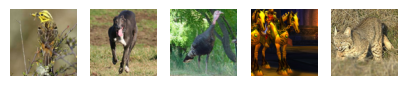

In [8]:
# train 이미지 확인
plt.figure(figsize=(5, 1))
for i in range(5):
    ax = plt.subplot(1, 5, i+1)
    train_files = os.listdir(train_folder)
    train_files_sample = train_files[:5]
    train_np = np.array([np.array(Image.open(os.path.join(train_folder, f))) for f in train_files_sample])
    img = train_np[i]
    plt.imshow(img)
    ax.axis('off')
plt.show()

In [9]:
print(os.listdir(test_folder))

['00000.png', '00001.png', '00002.png', '00003.png', '00004.png', '00005.png', '00006.png', '00007.png', '00008.png', '00009.png', '00010.png', '00011.png', '00012.png', '00013.png', '00014.png', '00015.png', '00016.png', '00017.png', '00018.png', '00019.png', '00020.png', '00021.png', '00022.png', '00023.png', '00024.png', '00025.png', '00026.png', '00027.png', '00028.png', '00029.png', '00030.png', '00031.png', '00032.png', '00033.png', '00034.png', '00035.png', '00036.png', '00037.png', '00038.png', '00039.png', '00040.png', '00041.png', '00042.png', '00043.png', '00044.png', '00045.png', '00046.png', '00047.png', '00048.png', '00049.png', '00050.png', '00051.png', '00052.png', '00053.png', '00054.png', '00055.png', '00056.png', '00057.png', '00058.png', '00059.png', '00060.png', '00061.png', '00062.png', '00063.png', '00064.png', '00065.png', '00066.png', '00067.png', '00068.png', '00069.png', '00070.png', '00071.png', '00072.png', '00073.png', '00074.png', '00075.png', '00076.png'

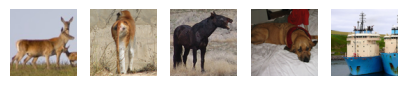

In [10]:
# test 이미지 확인
plt.figure(figsize=(5, 1))
for i in range(5):
    ax = plt.subplot(1, 5, i+1)
    test_files = os.listdir(test_folder)
    test_files_sample = test_files[:5]
    test_np = np.array([np.array(Image.open(os.path.join(test_folder, f))) for f in test_files_sample])
    img = test_np[i]
    plt.imshow(img)
    ax.axis('off')
plt.show()

In [11]:
labels_file = pd.read_csv(labels_path)
labels_file.head(10)

,label,name
0,1,00000.png
1,5,00001.png
2,1,00002.png
3,6,00003.png
4,3,00004.png
5,9,00005.png
6,7,00006.png
7,4,00007.png
8,5,00008.png
9,8,00009.png


- DataLoader

In [ ]:


criterion = nn.CrossEntropyLoss(label_smoothing=0.1) # 바꿔보기
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.5) # 바꿔보기
num_epochs = 100 # 바꿔보기

# 얼리 스탑핑 관련 변수
early_stopping_epoch = 20
n_epoch = 0
best_val_loss = 100000

total_step = len(train_loader)

for epoch in range(num_epochs):
    total_loss = 0

    pbar = tqdm(enumerate(train_loader), total=len(train_loader))
    model.train()
    for i, (images, labels) in pbar:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        pbar.set_description(f'Epoch [{epoch+1}/{num_epochs}], Loss: {round(total_loss / (i+1),4)}')


    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            val_loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print(f'Accuracy of the model on the test images: {100 * correct / total} %')
    
    # Early Stopping
    if val_loss >= best_val_loss: # val loss가 갱신않은 경우
        n_epoch += 1
        if n_epoch == early_stopping_epoch:
            break
        
    else: # val loss가 갱신된 경우 -> 최고 valid loss 업데이트
        best_val_loss = val_loss
        n_epoch = 0 # 참았던 횟수도 초기화 해야 함
        torch.save(model.state_dict(), 'best_model.pt') # 현재 best 모델 저장
        # final_model = model # 모델 갱신

In [29]:
# 변수
class Config:
    def __init__(self):
        self.test_size = 0.2
        self.val_size = 0.2
        self.random_state = 42
        self.input_dim = 3*96*96
        self.hidden_dims = [64, 32, 16]
        self.dropout_rate = 0.3
        self.batch_size = 128
        self.num_epochs = 200
        self.learning_rate = 0.001
        self.weight_decay = 0.0001
        self.patience = 20
        self.min_delta = 0.001
        self.scheduler_step_size = 30
        self.scheduler_gamma = 0.5

config = Config()

In [13]:
# 커스텀 데이터셋 클래스
class MyDataset(Dataset):
    def __init__(self, data_path, transform=None, train=True):
        self.train = train
        train_df = pd.read_csv(f"{data_path}/train_data.csv")
        self.name2label = dict(zip(train_df["name"], train_df["label"]))

        if self.train:
            self.img_path = glob(f"{data_path}/train_data/*.png")
            self.labels =  [self.name2label[os.path.basename(d)] for d in self.img_path]
        else:
            self.img_path = glob(f"{data_path}/test_data/*.png")

        self.transform = transform

    def __len__(self):
        return len(self.img_path)

    def __getitem__(self, index):
        img = Image.open(self.img_path[index])
        if img.mode != 'RGB':
            img = img.convert('RGB')

        if self.transform:
            img = self.transform(img)

        if self.train:
            return img, self.labels[index]
        else:
            return img, self.img_path[index].split("/")[-1]


In [18]:
# 데이터 처리1_커스텀 datapreprocessor
class DataPreprocessor:
    def __init__(self, config):
        self.config = config
        self.scaler = StandardScaler()

    def load_and_prepare_data(self, X, y):
        X_train_val, X_test, y_train_val, y_test = train_test_split(
            X, y, test_size=self.config.test_size, stratify=y, random_state=self.config.random_state
        )

        X_train, X_val, y_train, y_val = train_test_split(
            X_train_val, y_train_val, test_size=self.config.val_size,
            stratify=y_train_val, random_state=self.config.random_state
        )

        X_train_flat = np.array([x.flatten() for x in X_train])
        X_val_flat = np.array([x.flatten() for x in X_val])
        X_test_flat = np.array([x.flatten() for x in X_test])

        X_train = self.scaler.fit_transform(X_train_flat)
        X_val = self.scaler.transform(X_val_flat)
        X_test = self.scaler.transform(X_test_flat)

        print('데이터 준비 완료')
        print(f'Train: {X_train.shape[0]}, Val: {X_val.shape[0]}, Test: {X_test.shape[0]}')

        return X_train, X_val, X_test, y_train, y_val, y_test

    def create_flat_dataloaders(self, X_train, X_val, X_test, y_train, y_val, y_test):
        train_dataset = TensorDataset(
            torch.FloatTensor(X_train),
            torch.FloatTensor(y_train).view(-1, 1)
        )
        val_dataset = TensorDataset(
            torch.FloatTensor(X_val),
            torch.FloatTensor(y_val).view(-1, 1)
        )
        test_dataset = TensorDataset(
            torch.FloatTensor(X_test),
            torch.FloatTensor(y_test).view(-1, 1)
        )

        train_loader = DataLoader(train_dataset, batch_size=self.config.batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=self.config.batch_size, shuffle=False)
        test_loader = DataLoader(test_dataset, batch_size=self.config.batch_size, shuffle=False)

        print(f'DataLoader 생성 완료 (Batch Size: {self.config.batch_size})')

        return train_loader, val_loader, test_loader

print('DataPreprocessor 클래스 정의 완료!')

DataPreprocessor 클래스 정의 완료!


In [ ]:
# 데이터 처리2_transform
transform = transforms.v2.Compose([
    v2.RandomHorizontalFlip(),
    v2.RandomRotation(10),
    v2.ToTensor(),
    v2.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    
])

test_transform =  transforms.v2.Compose([
    v2.ToTensor(),
    v2.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    transforms.Lambda(lambda x: x.view(-1))
])

print('transform 정의완료')

transform 정의완료


In [19]:
# 데이터 가공
train_data = MyDataset(data_path, train=True)
test_data = MyDataset(data_path, train=False)

X = np.array([np.array(img) for img, label in train_data])
y = np.array([label for img, label in train_data])

# flatten 포함 과정
preprocessor = DataPreprocessor(config)
X_train, X_val, X_test, y_train, y_val, y_test = preprocessor.load_and_prepare_data(X, y)
train_loader, val_loader, test_loader = preprocessor.create_flat_dataloaders(
    X_train, X_val, X_test, y_train, y_val, y_test
)

# flatten 미포함 과정
# X_train_val, X_test, y_train_val, y_test = train_test_split(
#     X, y, test_size=config.test_size, stratify=y, random_state=config.random_state
# )

# X_train, X_val, y_train, y_val = train_test_split(
#     X_train_val, y_train_val, test_size=config.val_size,
#     stratify=y_train_val, random_state=config.random_state
# )

# transform
# X_train_t = torch.stack([transform(Image.fromarray(img)) for img in X_train])
# X_val_t = torch.stack([test_transform(Image.fromarray(img)) for img in X_val])

# y_train_t = torch.tensor(y_train, dtype=torch.long)
# y_val_t = torch.tensor(y_val, dtype=torch.long)

# TensorDataset
# Xtr_dataset = TensorDataset(X_train_t, y_train_t)
# Xvl_dataset = TensorDataset(X_val_t, y_val_t)

# # dataloader. shuffle 사용
# train_loader = torch.utils.data.DataLoader(Xtr_dataset, batch_size=config.batch_size, shuffle=True)
# val_loader = torch.utils.data.DataLoader(Xvl_dataset, batch_size=config.batch_size, shuffle=False)

# test_loader = torch.utils.data.DataLoader(test_data, batch_size=config.batch_size, shuffle=False)
print('데이터 준비완료')

데이터 준비 완료
Train: 3200, Val: 800, Test: 1000
DataLoader 생성 완료 (Batch Size: 128)
데이터 준비완료


In [20]:
# 데이터 확인
# class
print(f"cls 개수: {len(set(y_train))}")
print(f"cls 분포: {np.bincount(y_train)}")

# batch 분류확인
print(f'batch 분리: tr {len(train_loader)}, vl {len(val_loader)}, ts {len(test_loader)}')

# batch 형태
for images, labels in train_loader:
    print(f"batch 차원: {images.shape}")  # torch.Size([128, 3, 96, 96]) 예상
    print(f"batch 정답: {labels.shape}")  # torch.Size([128])
    break

# batch 내 샘플
batch = next(iter(train_loader))
img, label = batch
print(f"sample 타입 {type(img)}, {img.shape if isinstance(img, torch.Tensor) else img.size}")
print(f"sample 픽셀값 범위: {img.min()} ~ {img.max()}")
print(f"sample 분류: {label[0]}")

# batch 내 샘플 시각화 -> flatten으로 불가. transpose의 compose에서 view 지우기
# plt.imshow(img[0].permute(1, 2, 0))  # Tensor -> (H, W, C)
# plt.title(f"{label[0]}")
# print(f"sample {img[0]}")
# plt.show()

# shuffle
batch1 = next(iter(train_loader))[1]
batch2 = next(iter(train_loader))[1]
print(torch.equal(batch1, batch2))

cls 개수: 10
cls 분포: [320 320 320 320 320 320 320 320 320 320]
batch 분리: tr 25, vl 7, ts 8
batch 차원: torch.Size([128, 27648])
batch 정답: torch.Size([128, 1])
sample 타입 <class 'torch.Tensor'>, torch.Size([128, 27648])
sample 픽셀값 범위: -1.9869660139083862 ~ 2.8617007732391357
sample 분류: tensor([8.])
False


# Model

- 모델구현

In [23]:
# pretrained=False 확인
# ResNet
# CNN
# ViT Transformer
class Multi_Classifier(nn.Module):
    def __init__(self, input_dim, hidden_dims, dropout_rate=0.1):
        super().__init__()
        layers = []
        prev_dim = input_dim

        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.BatchNorm1d(hidden_dim)) # 1차원인 BN
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            prev_dim = hidden_dim

        layers.append(nn.Linear(prev_dim, 10))
        self.network = nn.Sequential(*layers)
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        return self.network(x)

In [30]:
# 모델 인스턴스 생성
model_mc = Multi_Classifier(
    input_dim=config.input_dim,
    hidden_dims=config.hidden_dims,
    dropout_rate=config.dropout_rate
)

model_mc = model_mc.to(device)

In [25]:
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0

print('EarlyStopping 클래스 정의 완료!')

EarlyStopping 클래스 정의 완료!


In [38]:
class Trainer:
    def __init__(self, model, config, device='cpu'):
        self.model = model.to(device)
        self.config = config
        self.device = device
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.AdamW(
            model.parameters(),
            lr=config.learning_rate,
            weight_decay=config.weight_decay
        )
        self.scheduler = optim.lr_scheduler.StepLR( # StepLR 초기에 빨리 내려가고, 점차 천천히
            self.optimizer,
            step_size=config.scheduler_step_size,
            gamma=config.scheduler_gamma
        )
        self.early_stopping = EarlyStopping(
            patience=config.patience,
            min_delta=config.min_delta
        )
        self.history = {
            'train_loss': [],
            'val_loss': [],
            'train_acc': [],
            'val_acc': [],
            'learning_rate': []
        }

    def train_epoch(self, train_loader):
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0

        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(self.device), batch_y.to(self.device).squeeze().long()
            self.optimizer.zero_grad()
            outputs = self.model(batch_X)
            loss = self.criterion(outputs, batch_y)
            loss.backward()
            self.optimizer.step()

            total_loss += loss.item() * batch_X.size(0)
            _, predicted = torch.max(outputs, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()

        return total_loss / total, correct / total

    def validate(self, val_loader):
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(self.device), batch_y.to(self.device)
                outputs = self.model(batch_X)
                loss = self.criterion(outputs, batch_y)

                total_loss += loss.item() * batch_X.size(0)
                _, predicted = torch.max(outputs, 1)
                total += batch_y.size(0)
                correct += (predicted == batch_y).sum().item()

        return total_loss / total, correct / total

    def fit(self, train_loader, val_loader):
        print('학습 시작...')

        for epoch in range(self.config.num_epochs):
            train_loss, train_acc = self.train_epoch(train_loader)
            val_loss, val_acc = self.validate(val_loader)
            self.scheduler.step()
            current_lr = self.optimizer.param_groups[0]['lr'] # step_lr을 사용해서, current_lr. 여기도 편미분.

            self.history['train_loss'].append(train_loss)
            self.history['val_loss'].append(val_loss)
            self.history['train_acc'].append(train_acc)
            self.history['val_acc'].append(val_acc)
            self.history['learning_rate'].append(current_lr)

            if (epoch + 1) % 10 == 0:
                print(f"Epoch [{epoch+1:3d}/{self.config.num_epochs}] "
                      f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
                      f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f} | "
                      f"LR: {current_lr:.6f}")

            self.early_stopping(val_loss, self.model)
            if self.early_stopping.early_stop:
                print(f"Early Stopping at Epoch {epoch+1}")
                self.model.load_state_dict(self.early_stopping.best_model_state)
                break

        print('\n학습 완료!')

print('Trainer 클래스 정의 완료!')

Trainer 클래스 정의 완료!


In [39]:
trainer = Trainer(model_mc, config)
trainer.fit(train_loader, val_loader)

학습 시작...


RuntimeError: 0D or 1D target tensor expected, multi-target not supported

In [ ]:


criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.5)
num_epochs = 100 # 바꿔보기

# 얼리 스탑핑 관련 변수
early_stopping_epoch = 20
n_epoch = 0
best_val_loss = 100000

total_step = len(train_loader)

for epoch in range(num_epochs):
    total_loss = 0

    pbar = tqdm(enumerate(train_loader), total=len(train_loader))
    model.train()
    for i, (images, labels) in pbar:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        pbar.set_description(f'Epoch [{epoch+1}/{num_epochs}], Loss: {round(total_loss / (i+1),4)}')


    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            val_loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print(f'Accuracy of the model on the test images: {100 * correct / total} %')

    # Early Stopping
    if val_loss >= best_val_loss: # val loss가 갱신않은 경우
        n_epoch += 1
        if n_epoch == early_stopping_epoch:
            break

    else: # val loss가 갱신된 경우 -> 최고 valid loss 업데이트
        best_val_loss = val_loss
        n_epoch = 0 # 참았던 횟수도 초기화 해야 함
        torch.save(model.state_dict(), 'best_model.pt') # 현재 best 모델 저장
        # final_model = model # 모델 갱신

Epoch [1/100], Loss: 2.2662: 100%|██████████| 36/36 [01:54<00:00,  3.19s/it]


Accuracy of the model on the test images: 9.0 %


Epoch [2/100], Loss: 2.1011: 100%|██████████| 36/36 [00:21<00:00,  1.70it/s]


Accuracy of the model on the test images: 9.6 %


Epoch [3/100], Loss: 1.9816: 100%|██████████| 36/36 [00:19<00:00,  1.84it/s]


Accuracy of the model on the test images: 11.0 %


Epoch [4/100], Loss: 1.8976: 100%|██████████| 36/36 [00:20<00:00,  1.77it/s]


Accuracy of the model on the test images: 10.6 %


Epoch [5/100], Loss: 1.8621: 100%|██████████| 36/36 [00:19<00:00,  1.82it/s]


Accuracy of the model on the test images: 9.4 %


Epoch [6/100], Loss: 1.847: 100%|██████████| 36/36 [00:19<00:00,  1.84it/s]


Accuracy of the model on the test images: 8.4 %


Epoch [7/100], Loss: 1.833: 100%|██████████| 36/36 [00:19<00:00,  1.80it/s]


Accuracy of the model on the test images: 8.8 %


Epoch [8/100], Loss: 1.8301: 100%|██████████| 36/36 [00:19<00:00,  1.84it/s]


Accuracy of the model on the test images: 12.8 %


Epoch [9/100], Loss: 1.8308: 100%|██████████| 36/36 [00:20<00:00,  1.78it/s]


Accuracy of the model on the test images: 9.2 %


Epoch [10/100], Loss: 1.837: 100%|██████████| 36/36 [00:19<00:00,  1.82it/s]


Accuracy of the model on the test images: 13.6 %


Epoch [11/100], Loss: 1.8422: 100%|██████████| 36/36 [00:19<00:00,  1.87it/s]


Accuracy of the model on the test images: 15.2 %


Epoch [12/100], Loss: 1.8667: 100%|██████████| 36/36 [00:20<00:00,  1.78it/s]


Accuracy of the model on the test images: 19.8 %


Epoch [13/100], Loss: 1.8717: 100%|██████████| 36/36 [00:19<00:00,  1.81it/s]


Accuracy of the model on the test images: 15.6 %


Epoch [14/100], Loss: 1.9058: 100%|██████████| 36/36 [00:19<00:00,  1.80it/s]


Accuracy of the model on the test images: 16.2 %


Epoch [15/100], Loss: 1.9324: 100%|██████████| 36/36 [00:19<00:00,  1.83it/s]


Accuracy of the model on the test images: 18.6 %


Epoch [16/100], Loss: 1.9815: 100%|██████████| 36/36 [00:19<00:00,  1.85it/s]


Accuracy of the model on the test images: 19.6 %


Epoch [17/100], Loss: 2.0281: 100%|██████████| 36/36 [00:20<00:00,  1.78it/s]


Accuracy of the model on the test images: 28.0 %


Epoch [18/100], Loss: 2.0764: 100%|██████████| 36/36 [00:19<00:00,  1.84it/s]


Accuracy of the model on the test images: 33.2 %


Epoch [19/100], Loss: 2.1256: 100%|██████████| 36/36 [00:20<00:00,  1.80it/s]


Accuracy of the model on the test images: 29.6 %


Epoch [20/100], Loss: 2.1661: 100%|██████████| 36/36 [00:19<00:00,  1.83it/s]


Accuracy of the model on the test images: 25.6 %


Epoch [21/100], Loss: 2.2051: 100%|██████████| 36/36 [00:19<00:00,  1.85it/s]


Accuracy of the model on the test images: 28.6 %


Epoch [22/100], Loss: 2.2315: 100%|██████████| 36/36 [00:20<00:00,  1.79it/s]


Accuracy of the model on the test images: 28.4 %


Epoch [23/100], Loss: 2.2544: 100%|██████████| 36/36 [00:19<00:00,  1.84it/s]


Accuracy of the model on the test images: 29.2 %


Epoch [24/100], Loss: 2.2737: 100%|██████████| 36/36 [00:19<00:00,  1.82it/s]


Accuracy of the model on the test images: 27.8 %


Epoch [25/100], Loss: 2.2885: 100%|██████████| 36/36 [00:19<00:00,  1.81it/s]


Accuracy of the model on the test images: 21.2 %


Epoch [26/100], Loss: 2.2978: 100%|██████████| 36/36 [00:19<00:00,  1.86it/s]


Accuracy of the model on the test images: 10.0 %


Epoch [27/100], Loss: 2.3017: 100%|██████████| 36/36 [00:20<00:00,  1.78it/s]


Accuracy of the model on the test images: 7.0 %


Epoch [28/100], Loss: 2.3025: 100%|██████████| 36/36 [00:19<00:00,  1.85it/s]


Accuracy of the model on the test images: 7.0 %


Epoch [29/100], Loss: 2.3026: 100%|██████████| 36/36 [00:19<00:00,  1.82it/s]


Accuracy of the model on the test images: 7.0 %


Epoch [30/100], Loss: 2.3026: 100%|██████████| 36/36 [00:19<00:00,  1.81it/s]


Accuracy of the model on the test images: 7.0 %


Epoch [31/100], Loss: 2.3026: 100%|██████████| 36/36 [00:19<00:00,  1.87it/s]


Accuracy of the model on the test images: 7.0 %


Epoch [32/100], Loss: 2.3026: 100%|██████████| 36/36 [00:19<00:00,  1.80it/s]


Accuracy of the model on the test images: 7.0 %


Epoch [33/100], Loss: 2.3026: 100%|██████████| 36/36 [00:19<00:00,  1.86it/s]


Accuracy of the model on the test images: 7.0 %


Epoch [34/100], Loss: 2.3026: 100%|██████████| 36/36 [00:19<00:00,  1.82it/s]


Accuracy of the model on the test images: 7.0 %


Epoch [35/100], Loss: 2.3026: 100%|██████████| 36/36 [00:20<00:00,  1.79it/s]


Accuracy of the model on the test images: 7.0 %


Epoch [36/100], Loss: 2.3026: 100%|██████████| 36/36 [00:19<00:00,  1.85it/s]


Accuracy of the model on the test images: 7.0 %


Epoch [37/100], Loss: 2.3026: 100%|██████████| 36/36 [00:20<00:00,  1.78it/s]


Accuracy of the model on the test images: 7.0 %


Epoch [38/100], Loss: 2.3026: 100%|██████████| 36/36 [00:19<00:00,  1.84it/s]


Accuracy of the model on the test images: 7.0 %


# Evaluation (Test)

In [ ]:
len(val_loader.dataset)
len(test_loader.dataset)

8000

In [ ]:
# pretrained=False 확인
correct = 0
total = len(val_loader.dataset)

# 모델 불러오기
model = resnet18(pretrained=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.fc = nn.Linear(512, 10, bias=True)
model = model.to(device)


model.load_state_dict(torch.load('best_model.pt')) # 저장된 best 모델 불러오기



model.eval()
with torch.no_grad():
    for images, labels in val_loader: # 얼마나 성능이 나오는지 확인
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += torch.sum((predicted == labels)).item()

print(f'Accuracy : {100 * correct / total} %')


Accuracy : 33.2 %


# Make SubmitFile

In [ ]:
# 수정금지
import pandas as pd

# 제출 파일 submission.csv 생성
outputs = {
    'Id': [],
    'Prediction': []
}

for images, id in tqdm(test_loader):
    model.eval()
    with torch.no_grad():
        output = model(images.to(device))
        _, predicted = torch.max(output, 1)
        outputs['Prediction'] += predicted.tolist()
        outputs['Id'] += id

df = pd.DataFrame(outputs)

df.to_csv('/content/drive/MyDrive/project/submission.csv', index=False, columns=['Id', 'Prediction'])

100%|██████████| 63/63 [1:16:13<00:00, 72.59s/it]


In [ ]:
# 수정금지

# 제출파일 다운로드
from google.colab import files

file_path = "/content/drive/MyDrive/project/submission.csv"
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# eos